In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crypto-train/train.parquet
/kaggle/input/crypto-test/test.parquet


In [2]:
# Get the train data
df = pd.read_parquet("/kaggle/input/crypto-train/train.parquet") 
df.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X882,X883,X884,X885,X886,X887,X888,X889,X890,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,...,1.925423,1.847943,0.005676,0.190791,0.369691,0.377630,0.210153,0.159183,0.530636,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,...,1.928569,1.849468,0.005227,0.184660,0.363642,0.374515,0.209573,0.158963,0.530269,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,...,1.928047,1.849282,0.004796,0.178719,0.357689,0.371424,0.208993,0.158744,0.529901,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,...,1.928621,1.849608,0.004398,0.172967,0.351832,0.368358,0.208416,0.158524,0.529534,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,...,1.927084,1.848950,0.004008,0.167391,0.346066,0.365314,0.207839,0.158304,0.529167,0.362452


> ***Basic info & Missing Value***

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Show all columns
pd.set_option('display.max_columns', None)

# Dataset shape and general info
print("Dataset shape (rows × columns):")
print(df.shape)

print("\nData types and missing values:")
df.info()

# Count missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nColumns with missing values:")
print(missing.head(10))

Dataset shape (rows × columns):
(525887, 896)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525887 entries, 2023-03-01 00:00:00 to 2024-02-29 23:59:00
Columns: 896 entries, bid_qty to label
dtypes: float64(896)
memory usage: 3.5 GB

Columns with missing values:
Series([], dtype: int64)


> ***Label Distribution***

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


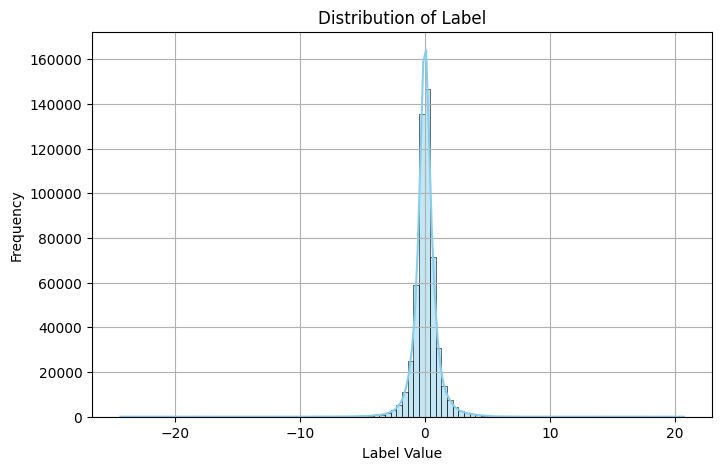

count    525887.000000
mean          0.036126
std           1.009914
min         -24.416615
25%          -0.381585
50%           0.016262
75%           0.434135
max          20.740270
Name: label, dtype: float64


In [4]:
# Plot distribution of the target variable "label"
plt.figure(figsize=(8, 5))
sns.histplot(df['label'], bins=100, kde=True, color='skyblue')
plt.title("Distribution of Label")
plt.xlabel("Label Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Describe "label"
print(df['label'].describe())

> ***Market Feature Overview***

In [5]:
# Define market-related columns
market_cols = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']

# Summary statistics for market features
print("\nSummary statistics of market features:")
print(df[market_cols].describe().T)


Summary statistics of market features:
             count        mean         std    min      25%      50%       75%  \
bid_qty   525887.0    9.968003   15.645741  0.001   2.6340    6.415   13.0850   
ask_qty   525887.0   10.174169   15.889582  0.001   2.6780    6.538   13.3300   
buy_qty   525887.0  131.726678  307.267251  0.000  26.4070   57.015  127.6390   
sell_qty  525887.0  132.673944  309.803040  0.000  27.0210   58.047  129.1100   
volume    525887.0  264.400622  588.618746  0.000  60.6885  120.799  256.7335   

                max  
bid_qty    1114.932  
ask_qty    1352.965  
buy_qty   17614.400  
sell_qty  17686.234  
volume    28701.419  


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


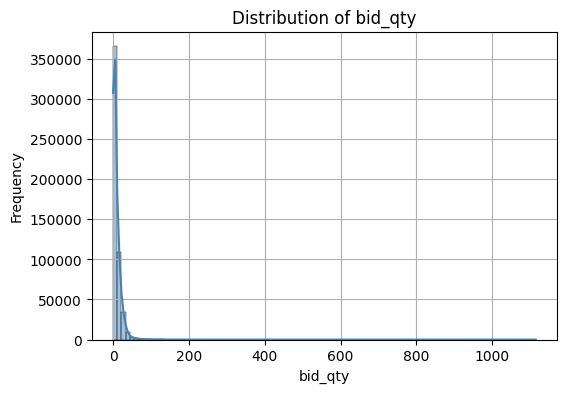

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


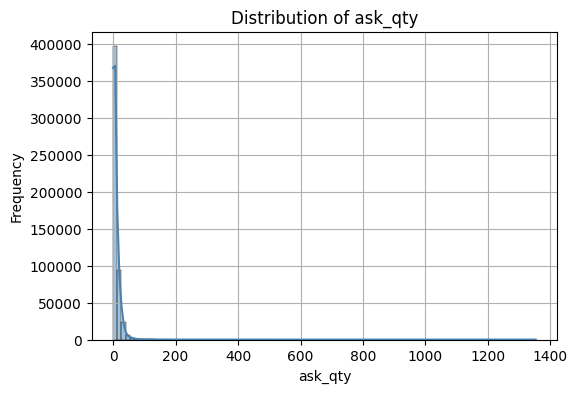

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


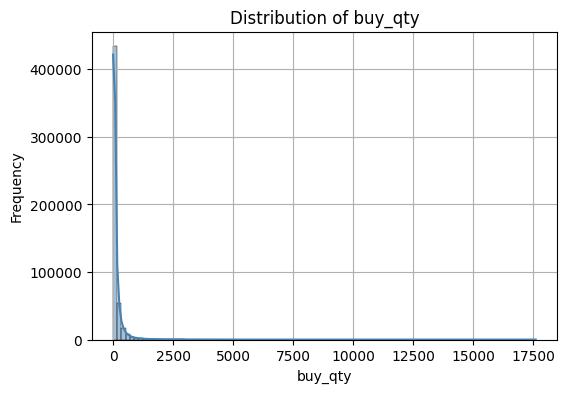

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


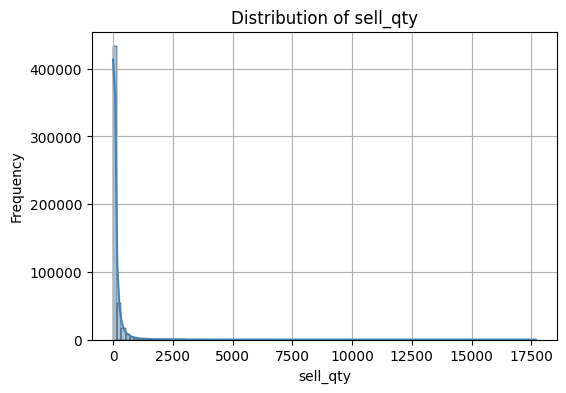

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


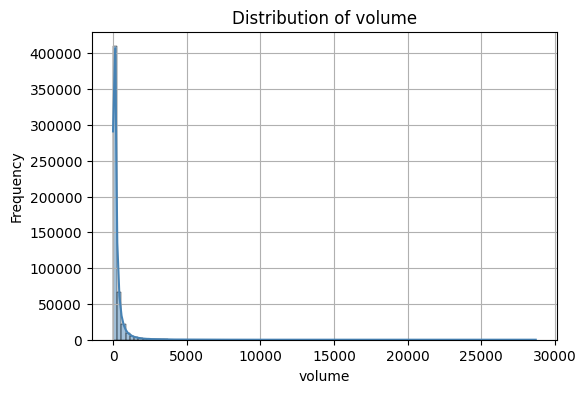

In [6]:
# Visualize each market feature distribution
for col in market_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=100, kde=True,color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

> ***Correlation with Label (Market Features)***


Correlation with label (market features):
sell_qty    0.011166
volume      0.008809
buy_qty     0.005618
bid_qty    -0.013220
ask_qty    -0.015762
Name: label, dtype: float64


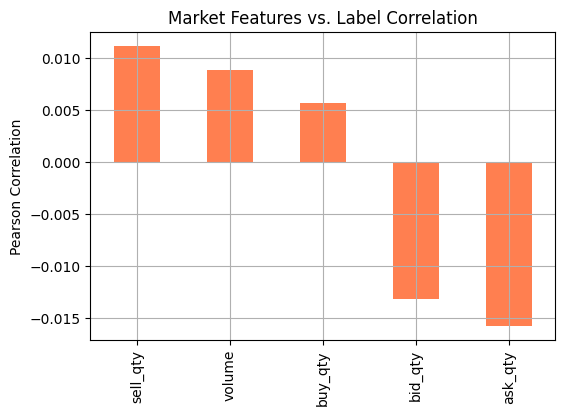

In [7]:
# Pearson correlation between label and market features
correlations = df[market_cols + ['label']].corr()['label'].drop('label').sort_values(ascending=False)
print("\nCorrelation with label (market features):")
print(correlations)

# Bar plot of correlations
plt.figure(figsize=(6, 4))
correlations.plot(kind='bar', color='coral')
plt.title("Market Features vs. Label Correlation")
plt.ylabel("Pearson Correlation")
plt.grid(True)
plt.show()

In [8]:
# Get all anonymous feature columns
anon_cols = [col for col in df.columns if col.startswith("X")]

# Empty Series to collect correlation results
corr_results = pd.Series(dtype=float)

# Compute correlations in small batches (100 features per batch)
batch_size = 100
for i in range(0, len(anon_cols), batch_size):
    batch = anon_cols[i:i+batch_size]
    corr_batch = df[batch + ['label']].corr()['label'].drop('label')
    corr_results = pd.concat([corr_results, corr_batch])

# Get top positively and negatively correlated features
top_positive = corr_results.sort_values(ascending=False).head(10)
top_negative = corr_results.sort_values(ascending=True).head(10)

# Print results
print("Top positively correlated anonymous features:")
print(top_positive)

print("\nTop negatively correlated anonymous features:")
print(top_negative)

Top positively correlated anonymous features:
X21     0.069401
X20     0.067667
X28     0.064092
X863    0.064057
X29     0.062339
X19     0.062293
X27     0.062251
X22     0.057676
X858    0.057320
X219    0.056713
dtype: float64

Top negatively correlated anonymous features:
X531   -0.056184
X524   -0.048020
X137   -0.044290
X95    -0.042948
X580   -0.041725
X758   -0.041465
X754   -0.041188
X538   -0.040992
X131   -0.040582
X89    -0.040520
dtype: float64


> ***Create Baseline Model - LightGBM***

In [9]:
features = [
    'X21', 'X20', 'X28', 'X863', 'X29',       # top positive
    'X531', 'X524', 'X137', 'X95', 'X580',    # top negative
    'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume'  # public
]

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from lightgbm import early_stopping, log_evaluation

# Prepare features and target
X = df[features]
y = df['label']

# Train/validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

# Model parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'seed': 42,
    'verbose': -1
}

# Train model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate using Pearson correlation
corr, _ = pearsonr(y_valid, y_pred)
print(f"Pearson correlation on validation set: {corr:.4f}")

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.929719	valid_1's rmse: 0.939422
[200]	training's rmse: 0.889237	valid_1's rmse: 0.901159
[300]	training's rmse: 0.859522	valid_1's rmse: 0.87453
[400]	training's rmse: 0.835577	valid_1's rmse: 0.853133
[500]	training's rmse: 0.81498	valid_1's rmse: 0.834739
[600]	training's rmse: 0.796512	valid_1's rmse: 0.818461
[700]	training's rmse: 0.779265	valid_1's rmse: 0.803885
[800]	training's rmse: 0.76295	valid_1's rmse: 0.789904
[900]	training's rmse: 0.746492	valid_1's rmse: 0.775228
[1000]	training's rmse: 0.733147	valid_1's rmse: 0.763481
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.733147	valid_1's rmse: 0.763481
Pearson correlation on validation set: 0.7048


> ***Create XGBoost Model***

In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

features = [
    'X21', 'X20', 'X28', 'X863', 'X29',
    'X531', 'X524', 'X137', 'X95', 'X580',
    'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume'
]

X = df[features]
y = df['label']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=watchlist,
    early_stopping_rounds=50,
    verbose_eval=100
)

y_pred = model.predict(dvalid)

corr, _ = pearsonr(y_valid, y_pred)
print(f"Pearson correlation on validation set (XGBoost): {corr:.4f}")

[0]	train-rmse:1.00629	valid-rmse:1.01443
[100]	train-rmse:0.92155	valid-rmse:0.93401
[200]	train-rmse:0.88123	valid-rmse:0.89761
[300]	train-rmse:0.84777	valid-rmse:0.86793
[400]	train-rmse:0.82268	valid-rmse:0.84647
[500]	train-rmse:0.79851	valid-rmse:0.82563
[600]	train-rmse:0.77937	valid-rmse:0.80987
[700]	train-rmse:0.76217	valid-rmse:0.79571
[800]	train-rmse:0.74595	valid-rmse:0.78265
[900]	train-rmse:0.73231	valid-rmse:0.77195
[999]	train-rmse:0.71857	valid-rmse:0.76114
Pearson correlation on validation set (XGBoost): 0.6981


> ***Use more anonymous features for LightGBM***

In [19]:
features = [
    'X21', 'X20', 'X28', 'X863', 'X29', 'X19', 'X27', 'X22', 'X858', 'X219',      # top positive
    'X531', 'X524', 'X137', 'X95', 'X580', 'X758', 'X754', 'X538', 'X131', 'X89',    # top negative
    'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume'  # public
]

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from lightgbm import early_stopping, log_evaluation

# Prepare features and target
X = df[features]
y = df['label']

# Train/validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)

# Model parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'seed': 42,
    'verbose': -1
}

# Train model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=100)
    ]
)

# Predict on validation set
y_pred = model.predict(X_valid)

# Evaluate using Pearson correlation
corr, _ = pearsonr(y_valid, y_pred)
print(f"Pearson correlation on validation set: {corr:.4f}")

Training until validation scores don't improve for 50 rounds
[100]	training's rmse: 0.899647	valid_1's rmse: 0.908171
[200]	training's rmse: 0.843416	valid_1's rmse: 0.854722
[300]	training's rmse: 0.800471	valid_1's rmse: 0.814249
[400]	training's rmse: 0.76556	valid_1's rmse: 0.781835
[500]	training's rmse: 0.733465	valid_1's rmse: 0.752848
[600]	training's rmse: 0.708046	valid_1's rmse: 0.729277
[700]	training's rmse: 0.685385	valid_1's rmse: 0.708549
[800]	training's rmse: 0.664153	valid_1's rmse: 0.689037
[900]	training's rmse: 0.645709	valid_1's rmse: 0.6727
[1000]	training's rmse: 0.626467	valid_1's rmse: 0.655351
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.626467	valid_1's rmse: 0.655351
Pearson correlation on validation set: 0.8034


> ***Use more anonymous features for XGBoost***

In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

features = [
    'X21', 'X20', 'X28', 'X863', 'X29', 'X19', 'X27', 'X22', 'X858', 'X219',      # top positive
    'X531', 'X524', 'X137', 'X95', 'X580', 'X758', 'X754', 'X538', 'X131', 'X89',    # top negative
    'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume'  # public
]

X = df[features]
y = df['label']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

model_xgb = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=watchlist,
    early_stopping_rounds=50,
    verbose_eval=100
)

y_pred = model_xgb.predict(dvalid)

corr, _ = pearsonr(y_valid, y_pred)
print(f"Pearson correlation on validation set (XGBoost): {corr:.4f}")

[0]	train-rmse:1.00502	valid-rmse:1.01308
[100]	train-rmse:0.88897	valid-rmse:0.89996
[200]	train-rmse:0.83087	valid-rmse:0.84455
[300]	train-rmse:0.78604	valid-rmse:0.80275
[400]	train-rmse:0.74916	valid-rmse:0.76899
[500]	train-rmse:0.71493	valid-rmse:0.73874
[600]	train-rmse:0.68613	valid-rmse:0.71256
[700]	train-rmse:0.66039	valid-rmse:0.68953
[800]	train-rmse:0.63835	valid-rmse:0.67032
[900]	train-rmse:0.61638	valid-rmse:0.65091
[999]	train-rmse:0.59632	valid-rmse:0.63313
Pearson correlation on validation set (XGBoost): 0.8136


> ***Add interaction terms to build the model***

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from xgboost import XGBRegressor

# Anonymous features + public features
anon_features = ['X21', 'X20', 'X28', 'X863', 'X29', 'X19', 'X27', 'X22', 'X858', 'X219',
                 'X531', 'X524', 'X137', 'X95', 'X580', 'X758', 'X754', 'X538', 'X131', 'X89']
public_features = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume']

# Creating interactive features
for a_feat in anon_features:
    for p_feat in public_features:
        df[f'{a_feat}_x_{p_feat}'] = df[a_feat] * df[p_feat]

# Construct the final feature set
interaction_features = [f'{a}_x_{p}' for a in anon_features for p in public_features]
all_features = anon_features + public_features + interaction_features

X = df[all_features]
y = df['label']

# Split into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost model
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=50, verbose=100)

# Training the XGBoost model
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
pearson = pearsonr(y_val, y_pred)[0]

print(f'RMSE on validation set: {rmse:.4f}')
print(f'Pearson correlation on validation set: {pearson:.4f}')


/tmp/ipykernel_35/2972569829.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{a_feat}_x_{p_feat}'] = df[a_feat] * df[p_feat]
/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:1.01405
[100]	validation_0-rmse:0.90410
[200]	validation_0-rmse:0.85123
[300]	validation_0-rmse:0.81235
[400]	validation_0-rmse:0.77884
[500]	validation_0-rmse:0.75141
[600]	validation_0-rmse:0.72886
[700]	validation_0-rmse:0.70919
[800]	validation_0-rmse:0.69293
[900]	validation_0-rmse:0.67655
[999]	validation_0-rmse:0.66194
RMSE on validation set: 0.6619
Pearson correlation on validation set: 0.7927


***After comparison, I will choose the xgboost model combined with 20 anonymous variables and 5 public variables. Then I will use this model to make prediction***

In [14]:
# get test data
df_test = pd.read_parquet("/kaggle/input/crypto-test/test.parquet") 
df_test.head()

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X233,X234,X235,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X268,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X289,X290,X291,X292,X293,X294,X295,X296,X297,X298,X299,X300,X301,X302,X303,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X381,X382,X383,X384,X385,X386,X387,X388,X389,X390,X391,X392,X393,X394,X395,X396,X397,X398,X399,X400,X401,X402,X403,X404,X405,X406,X407,X408,X409,X410,X411,X412,X413,X414,X415,X416,X417,X418,X419,X420,X421,X422,X423,X424,X425,X426,X427,X428,X429,X430,X431,X432,X433,X434,X435,X436,X437,X438,X439,X440,X441,X442,X443,X444,X445,X446,X447,X448,X449,X450,X451,X452,X453,X454,X455,X456,X457,X458,X459,X460,X461,X462,X463,X464,X465,X466,X467,X468,X469,X470,X471,X472,X473,X474,X475,X476,X477,X478,X479,X480,X481,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491,X492,X493,X494,X495,X496,X497,X498,X499,X500,X501,X502,X503,X504,X505,X506,X507,X508,X509,X510,X511,X512,X513,X514,X515,X516,X517,X518,X519,X520,X521,X522,X523,X524,X525,X526,X527,X528,X529,X530,X531,X532,X533,X534,X535,X536,X537,X538,X539,X540,X541,X542,X543,X544,X545,X546,X547,X548,X549,X550,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560,X561,X562,X563,X564,X565,X566,X567,X568,X569,X570,X571,X572,X573,X574,X575,X576,X577,X578,X579,X580,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590,X591,X592,X593,X594,X595,X596,X597,X598,X599,X600,X601,X602,X603,X604,X605,X606,X607,X608,X609,X610,X611,X612,X613,X614,X615,X616,X617,X618,X619,X620,X621,X622,X623,X624,X625,X626,X627,X628,X629,X630,X631,X632,X633,X634,X635,X636,X637,X638,X639,X640,X641,X642,X643,X644,X645,X646,X647,X648,X649,X650,X651,X652,X653,X654,X655,X656,X657,X658,X659,X660,X661,X662,X663,X664,X665,X666,X667,X668,X669,X670,X671,X672,X673,X674,X675,X676,X677,X678,X679,X680,X681,X682,X683,X684,X685,X686,X687,X688,X689,X690,X691,X692,X693,X694,X695,X696,X697,X698,X699,X700,X701,X702,X703,X704,X705,X706,X707,X708,X709,X710,X711,X712,X713,X714,X715,X716,X717,X718,X719,X720,X721,X722,X723,X724,X725,X726,X727,X728,X729,X730,X731,X732,X733,X734,X735,X736,X737,X738,X739,X740,X741,X742,X743,X744,X745,X746,X747,X748,X749,X750,X751,X752,X753,X754,X755,X756,X757,X758,X759,X760,X761,X762,X763,X764,X765,X766,X767,X768,X769,X770,X771,X772,X773,X774,X775,X776,X777,X778,X779,X780,X781,X782,X783,X784,X785,X786,X787,X788,X789,X790,X791,X792,X793,X794,X795,X796,X797,X798,X799,X800,X801,X802,X803,X804,X805,X806,X807,X808,X809,X810,X811,X812,X813,X8

In [20]:
features = [
    'X21', 'X20', 'X28', 'X863', 'X29', 'X19', 'X27', 'X22', 'X858', 'X219',      # top positive
    'X531', 'X524', 'X137', 'X95', 'X580', 'X758', 'X754', 'X538', 'X131', 'X89',    # top negative
    'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume'  # public
]

X_test = df_test[features]
dtest = xgb.DMatrix(X_test)

# predict using xgboost model
y_test_pred = model_xgb.predict(dtest)

# create dataframe
submission = pd.DataFrame({
    'ID': df_test.index,      
    'prediction': y_test_pred
})


# save as .csv
submission.to_csv("submission.csv", index=False)

In [21]:
# look at submission
submission.head()

,ID,prediction
0,1,0.150981
1,2,0.145031
2,3,-0.115538
3,4,-0.085533
4,5,-0.006276
